In [1]:
import matplotlib.pyplot as plt
import chess.pgn
import numpy as np 
import chess

pgn = open("D:\\projets\\chess\\data\\lichess_elite_2020-06.pgn")

In [2]:
def get_base_vect(size):
    arr = [0 for i in range(size)]
    return np.array(arr)

def get_vect(board):
    pieces = [chess.PAWN, chess.KNIGHT, chess.BISHOP, chess.ROOK, chess.QUEEN, chess.KING]
    colors = [chess.WHITE, chess.BLACK]
    vect = get_base_vect(len(pieces)*2*64)
    for i in range(len(colors)):
        for e in range(len(pieces)):
            lst = board.pieces(color=colors[i], piece_type=pieces[e])
            for position in lst:
                vect[position*len(pieces)*2 + i*len(pieces) + e] = 1
    return vect

In [3]:
X, Y = [], []
Y_ = []

for i in range(1000):
   game = chess.pgn.read_game(pgn)
   if game.headers["Result"] == "1/2-1/2":
      continue
   winner = 0
   y_ = 0
   if game.headers["Result"] == "1-0":
      y_ = 1 
   if game.headers["Result"] == "0-1":
      y_ = 2

   vectY = np.zeros(3)
   vectY[y_] = 1
   board = game.board()

   for move in game.mainline_moves():
      board.push(move)
      vect = get_vect(board)
      X.append(vect)
      Y.append(y_)
      Y_.append(vectY)

print(len(X))

73856


In [4]:
X = np.array(X)
Y = np.array(Y)
Y1 = np.array(Y_)

print(X.shape)
print(Y.shape)

(73856, 768)
(73856,)


In [15]:
import tensorflow.keras as keras

model = keras.Sequential()
#  kernel_regularizer=keras.regularizers.L1(0.001)
model.add(keras.layers.Dense(92, activation="relu", kernel_regularizer=keras.regularizers.L1(0.0001), input_shape=(len(X[0]),)))
#model.add(keras.layers.Dense(32, kernel_regularizer=keras.regularizers.L1(0.0001), activation="relu"))
model.add(keras.layers.Dense(3, activation="softmax"))

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy"])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 92)                70748     
                                                                 
 dense_15 (Dense)            (None, 3)                 279       
                                                                 
Total params: 71,027
Trainable params: 71,027
Non-trainable params: 0
_________________________________________________________________


Epoch 1/40
433/433 [==============================] - 2s 3ms/step - loss: 1.0507 - accuracy: 0.5286 - val_loss: 0.9063 - val_accuracy: 0.5854
Epoch 2/40
433/433 [==============================] - 1s 3ms/step - loss: 0.8493 - accuracy: 0.6139 - val_loss: 0.8050 - val_accuracy: 0.6267
Epoch 3/40
433/433 [==============================] - 1s 3ms/step - loss: 0.7733 - accuracy: 0.6461 - val_loss: 0.7527 - val_accuracy: 0.6449
Epoch 4/40
433/433 [==============================] - 1s 2ms/step - loss: 0.7302 - accuracy: 0.6648 - val_loss: 0.7205 - val_accuracy: 0.6601
Epoch 5/40
433/433 [==============================] - 1s 3ms/step - loss: 0.7013 - accuracy: 0.6809 - val_loss: 0.6977 - val_accuracy: 0.6712
Epoch 6/40
433/433 [==============================] - 1s 3ms/step - loss: 0.6792 - accuracy: 0.6939 - val_loss: 0.6791 - val_accuracy: 0.6822
Epoch 7/40
433/433 [==============================] - 1s 3ms/step - loss: 0.6605 - accuracy: 0.7069 - val_loss: 0.6625 - val_accuracy: 0.6938
Epoch 

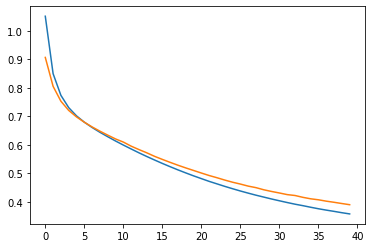

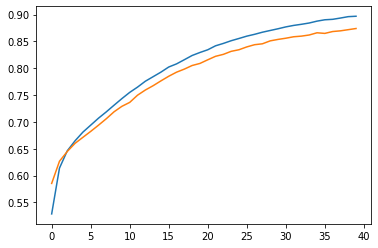

In [16]:
split = int(len(X)*0.75)

from sklearn.utils import shuffle
X, Y1 = shuffle(X, Y1, random_state=0)

hist = model.fit(X[0:split], Y1[0:split], batch_size=128, epochs=40, validation_data=(X[split:len(X)], Y1[split:len(Y)]),)

plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.show()

plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.show()